In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [20]:
# 1. Load and explore the dataset
def load_and_explore_data():
    # Load the dataset
    df = pd.read_csv('placement-dataset.csv')

    # Print basic information
    print("Dataset shape:", df.shape)
    print("\nFirst 5 rows:")
    print(df.head())

    # Basic statistics
    print("\nBasic statistics:")
    print(df.describe())

    # Check class distribution
    print("\nPlacement distribution:")
    print(df['placement'].value_counts())

    # Plot feature distributions
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.hist(df['cgpa'], bins=10, color='skyblue', edgecolor='black')
    plt.title('CGPA Distribution')
    plt.xlabel('CGPA')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    plt.hist(df['iq'], bins=15, color='salmon', edgecolor='black')
    plt.title('IQ Distribution')
    plt.xlabel('IQ Score')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

    # Visualize placement vs features
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(df[df['placement'] == 1]['cgpa'], df[df['placement'] == 1]['iq'],
                color='green', label='Placed', alpha=0.6)
    plt.scatter(df[df['placement'] == 0]['cgpa'], df[df['placement'] == 0]['iq'],
                color='red', label='Not Placed', alpha=0.6)
    plt.title('Placement based on CGPA and IQ')
    plt.xlabel('CGPA')
    plt.ylabel('IQ Score')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return df

Dataset shape: (100, 4)

First 5 rows:
   Unnamed: 0  cgpa     iq  placement
0           0   6.8  123.0          1
1           1   5.9  106.0          0
2           2   5.3  121.0          0
3           3   7.4  132.0          1
4           4   5.8  142.0          0

Basic statistics:
       Unnamed: 0        cgpa          iq   placement
count  100.000000  100.000000  100.000000  100.000000
mean    49.500000    5.991000  123.580000    0.500000
std     29.011492    1.143634   39.944198    0.502519
min      0.000000    3.300000   37.000000    0.000000
25%     24.750000    5.075000  101.500000    0.000000
50%     49.500000    6.000000  127.500000    0.500000
75%     74.250000    6.900000  149.000000    1.000000
max     99.000000    8.500000  233.000000    1.000000

Placement distribution:
placement
1    50
0    50
Name: count, dtype: int64


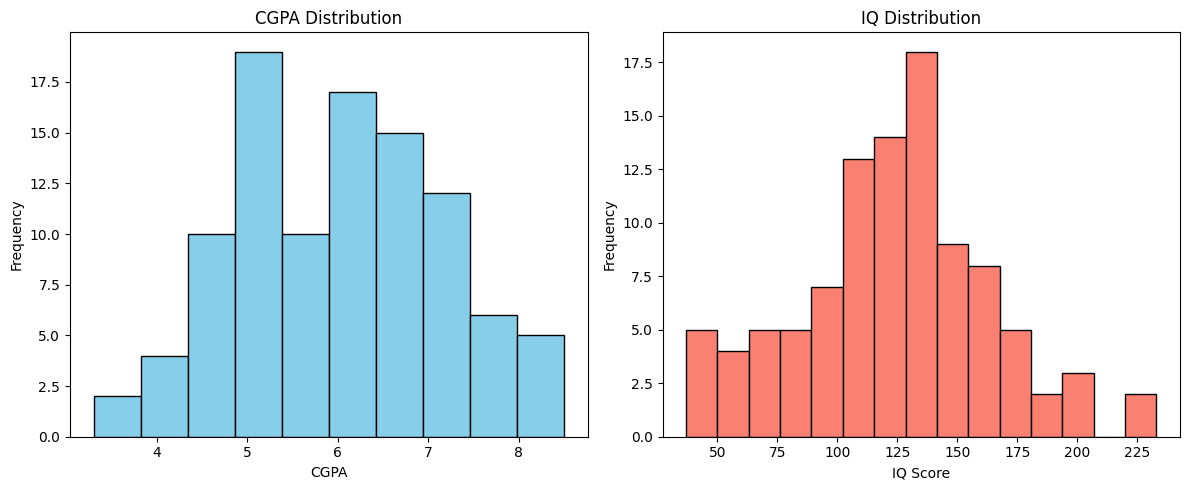

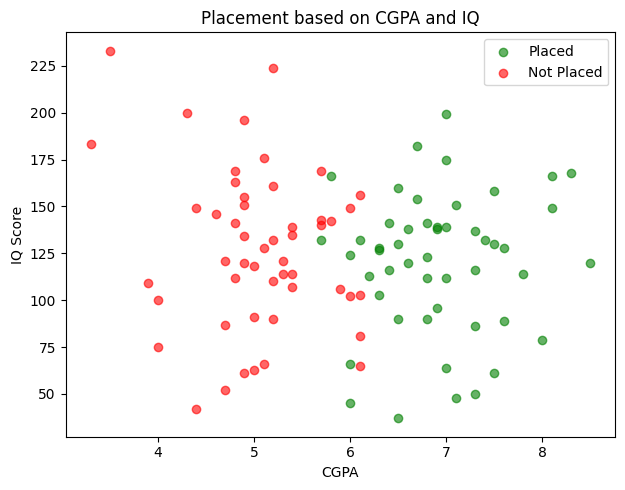

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [21]:
load_and_explore_data()

In [22]:
# 2. Preprocess the data
def preprocess_data(df):
    # Separate features and target
    X = df[['cgpa', 'iq']].values
    y = df['placement'].values

    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test, scaler

In [23]:
def initialize_parameters(layer_dimensions):
    # Set a fixed random seed to make the results reproducible
    np.random.seed(3)
    # Create an empty dictionary to store the weight and bias parameters
    parameters = {}
    # Get the number of layers in the network (including input and output layers)
    L = len(layer_dimensions)
    # Loop through layers 1 to L-1 (we skip layer 0 because it's the input layer)
    for l in range(1, L):
        # Initialize weights with small random values
        parameters['W' + str(l)] = np.random.randn(layer_dimensions[l - 1], layer_dimensions[l]) * 0.01
        # Initialize biases with zeros
        parameters['b' + str(l)] = np.zeros((layer_dimensions[l], 1))

    return parameters

In [24]:
def sigmoid(Z):
    A = 1/(1+np.exp(-Z))
    return A

In [25]:
def linear_forward(A_prev, W, b):
    # Compute the linear transformation Z = W^T * A_prev + b
    Z = np.dot(W.T, A_prev) + b
    # Apply sigmoid activation
    A = sigmoid(Z)
    return A

In [26]:
def L_layer_forward(X, parameters):
    # X: input vector of shape (input size, 1) - i.e., a single column (one data instance)
    # parameters: dictionary containing all the weights and biases for each layer
    A = X  # Initial activation is the input feature vector
    L = len(parameters) // 2  # Number of layers in the network

    # Loop through all the layers
    for l in range(1, L + 1):
        A_prev = A  # Store previous activation
        # Retrieve current layer's weights and bias
        Wl = parameters['W' + str(l)]
        bl = parameters['b' + str(l)]
        # Perform linear forward computation and sigmoid activation
        A = linear_forward(A_prev, Wl, bl)

    # Return final output (last activation), and the previous activation
    return A, A_prev

In [27]:
def compute_loss(y, y_hat):
    # Compute binary cross-entropy loss
    epsilon = 1e-15  # Small value to avoid log(0)
    y_hat = np.clip(y_hat, epsilon, 1 - epsilon)  # Clip to avoid numerical issues
    loss = -y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)
    return loss

In [28]:
def update_parameters(parameters, y, y_hat, A1, X, learning_rate=0.01):
    # Output layer (layer 2) updates
    # Gradient of loss w.r.t output
    dZ2 = y_hat - y

    # Update output layer weights and bias
    parameters['W2'][0][0] -= learning_rate * dZ2 * A1[0][0]
    parameters['W2'][1][0] -= learning_rate * dZ2 * A1[1][0]
    parameters['b2'][0][0] -= learning_rate * dZ2

    # Hidden layer (layer 1) updates
    # For neuron 1 in hidden layer
    grad_hidden1 = dZ2 * parameters['W2'][0][0] * A1[0][0] * (1 - A1[0][0])
    parameters['W1'][0][0] -= learning_rate * grad_hidden1 * X[0][0]
    parameters['W1'][0][1] -= learning_rate * grad_hidden1 * X[1][0]
    parameters['b1'][0][0] -= learning_rate * grad_hidden1

    # For neuron 2 in hidden layer
    grad_hidden2 = dZ2 * parameters['W2'][1][0] * A1[1][0] * (1 - A1[1][0])
    parameters['W1'][1][0] -= learning_rate * grad_hidden2 * X[0][0]
    parameters['W1'][1][1] -= learning_rate * grad_hidden2 * X[1][0]
    parameters['b1'][1][0] -= learning_rate * grad_hidden2

    return parameters

In [29]:
def train_model(X_train, y_train, layer_dimensions=[2, 2, 1], epochs=100, learning_rate=0.01):
    # Initialize parameters
    parameters = initialize_parameters(layer_dimensions)

    # Track loss history
    loss_history = []

    # Training loop
    for epoch in range(epochs):
        epoch_loss = 0

        # Iterate through training examples
        for i in range(X_train.shape[0]):
            # Get current example
            X = X_train[i].reshape(2, 1)
            y = y_train[i]

            # Forward propagation
            y_hat, A1 = L_layer_forward(X, parameters)
            y_hat = y_hat[0][0]

            # Compute loss
            loss = compute_loss(y, y_hat)
            epoch_loss += loss

            # Update parameters
            parameters = update_parameters(parameters, y, y_hat, A1, X, learning_rate)

        # Average loss for this epoch
        avg_loss = epoch_loss / X_train.shape[0]
        loss_history.append(avg_loss)

        # Print progress every 10 epochs
        if epoch % 10 == 0:
            print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")

    # Plot loss history
    plt.figure(figsize=(10, 6))
    plt.plot(loss_history)
    plt.title('Loss during Training')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

    return parameters, loss_history

In [30]:
def predict(X, parameters):
    # Make predictions for a set of examples
    predictions = []

    for i in range(X.shape[0]):
        x = X[i].reshape(2, 1)
        y_hat, _ = L_layer_forward(x, parameters)
        y_hat = y_hat[0][0]

        # Convert probabilities to binary predictions
        pred = 1 if y_hat >= 0.5 else 0
        predictions.append(pred)

    return np.array(predictions)

In [31]:
def evaluate_model(X_test, y_test, parameters):
    # Make predictions
    y_pred = predict(X_test, parameters)

    # Calculate accuracy
    accuracy = np.mean(y_pred == y_test)
    print(f"Test Accuracy: {accuracy:.4f}")

    # Print confusion matrix
    TP = np.sum((y_pred == 1) & (y_test == 1))
    TN = np.sum((y_pred == 0) & (y_test == 0))
    FP = np.sum((y_pred == 1) & (y_test == 0))
    FN = np.sum((y_pred == 0) & (y_test == 1))

    print("\nConfusion Matrix:")
    print(f"True Positives: {TP}, True Negatives: {TN}")
    print(f"False Positives: {FP}, False Negatives: {FN}")

    # Calculate precision, recall, F1 score
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    print(f"\nPrecision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Visualize decision boundary
    if X_test.shape[1] == 2:  # Only for 2D features
        plot_decision_boundary(X_test, y_test, parameters)

    return accuracy, precision, recall, f1

In [32]:
def plot_decision_boundary(X, y, parameters):
    # Create a meshgrid
    h = 0.01  # Step size
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Make predictions for each point in the meshgrid
    Z = np.zeros((yy.shape[0], xx.shape[1]))
    for i in range(yy.shape[0]):
        for j in range(xx.shape[1]):
            x = np.array([xx[i, j], yy[i, j]]).reshape(2, 1)
            pred, _ = L_layer_forward(x, parameters)
            Z[i, j] = pred[0][0] >= 0.5

    # Plot the decision boundary
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdBu)

    # Plot the training points
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='red', label='Not Placed', edgecolors='k')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='green', label='Placed', edgecolors='k')

    plt.title('Decision Boundary')
    plt.xlabel('Normalized CGPA')
    plt.ylabel('Normalized IQ')
    plt.legend()
    plt.grid(True)
    plt.show()

In [33]:
# Main execution
def main():
    # Load and explore data
    df = load_and_explore_data()

    # Preprocess data
    X_train, X_test, y_train, y_test, scaler = preprocess_data(df)

    # Define neural network architecture
    layer_dimensions = [2, 2, 1]  # 2 input features, 2 neurons in hidden layer, 1 output

    # Train the model
    trained_parameters, loss_history = train_model(
        X_train, y_train,
        layer_dimensions=layer_dimensions,
        epochs=500,
        learning_rate=0.03
    )

    # Evaluate the model
    evaluate_model(X_test, y_test, trained_parameters)

    # Display final parameters
    print("\nFinal Parameters:")
    for key, value in trained_parameters.items():
        print(f"{key}:\n{value}")

    return trained_parameters, scaler

Dataset shape: (100, 4)

First 5 rows:
   Unnamed: 0  cgpa     iq  placement
0           0   6.8  123.0          1
1           1   5.9  106.0          0
2           2   5.3  121.0          0
3           3   7.4  132.0          1
4           4   5.8  142.0          0

Basic statistics:
       Unnamed: 0        cgpa          iq   placement
count  100.000000  100.000000  100.000000  100.000000
mean    49.500000    5.991000  123.580000    0.500000
std     29.011492    1.143634   39.944198    0.502519
min      0.000000    3.300000   37.000000    0.000000
25%     24.750000    5.075000  101.500000    0.000000
50%     49.500000    6.000000  127.500000    0.500000
75%     74.250000    6.900000  149.000000    1.000000
max     99.000000    8.500000  233.000000    1.000000

Placement distribution:
placement
1    50
0    50
Name: count, dtype: int64


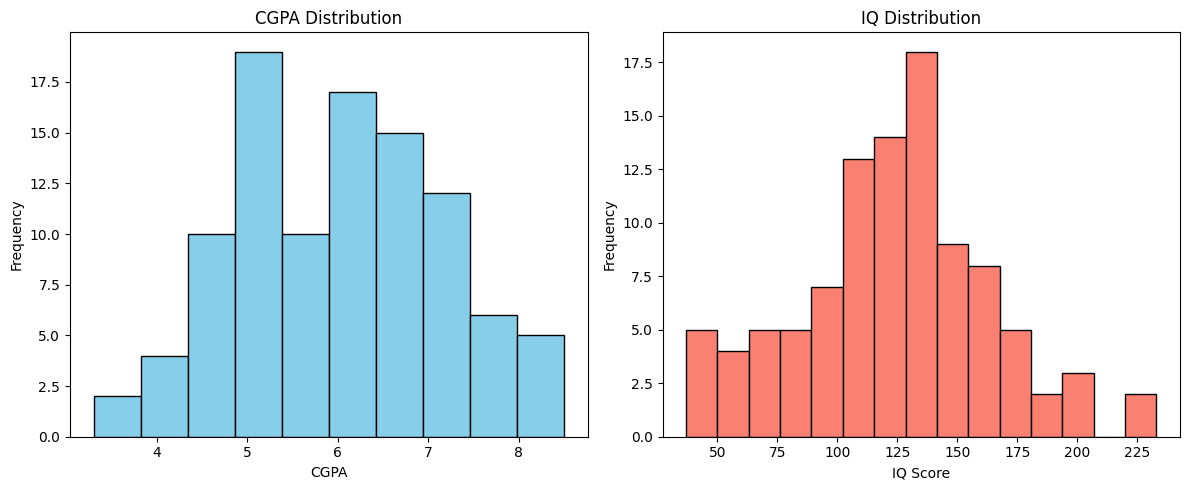

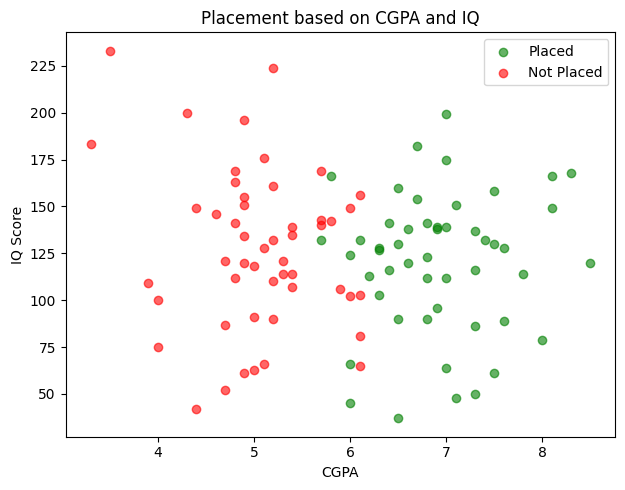

Epoch 1/500, Loss: 0.6981
Epoch 11/500, Loss: 0.6977
Epoch 21/500, Loss: 0.6637
Epoch 31/500, Loss: 0.4551
Epoch 41/500, Loss: 0.3060
Epoch 51/500, Loss: 0.2335
Epoch 61/500, Loss: 0.1974
Epoch 71/500, Loss: 0.1773
Epoch 81/500, Loss: 0.1647
Epoch 91/500, Loss: 0.1557
Epoch 101/500, Loss: 0.1487
Epoch 111/500, Loss: 0.1431
Epoch 121/500, Loss: 0.1384
Epoch 131/500, Loss: 0.1347
Epoch 141/500, Loss: 0.1317
Epoch 151/500, Loss: 0.1293
Epoch 161/500, Loss: 0.1275
Epoch 171/500, Loss: 0.1260
Epoch 181/500, Loss: 0.1249
Epoch 191/500, Loss: 0.1239
Epoch 201/500, Loss: 0.1231
Epoch 211/500, Loss: 0.1224
Epoch 221/500, Loss: 0.1218
Epoch 231/500, Loss: 0.1213
Epoch 241/500, Loss: 0.1209
Epoch 251/500, Loss: 0.1205
Epoch 261/500, Loss: 0.1201
Epoch 271/500, Loss: 0.1198
Epoch 281/500, Loss: 0.1195
Epoch 291/500, Loss: 0.1193
Epoch 301/500, Loss: 0.1190
Epoch 311/500, Loss: 0.1188
Epoch 321/500, Loss: 0.1186
Epoch 331/500, Loss: 0.1184
Epoch 341/500, Loss: 0.1182
Epoch 351/500, Loss: 0.1180
Epo

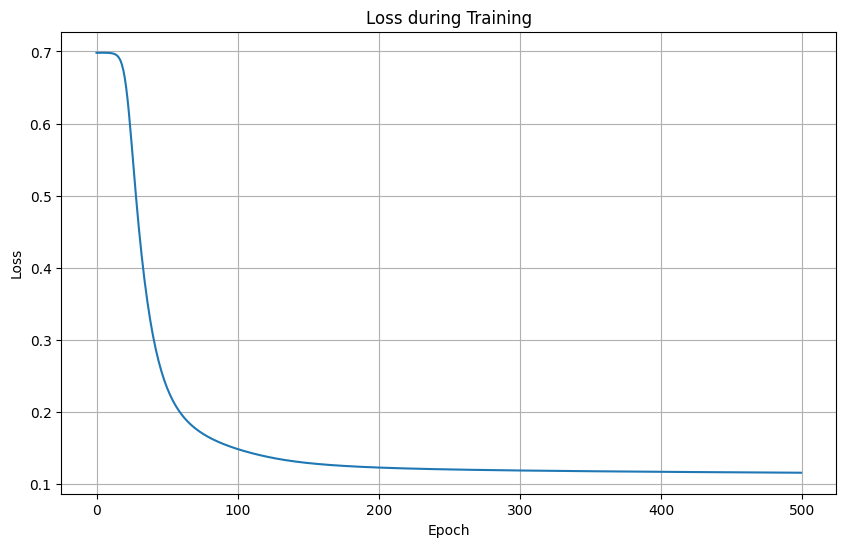

Test Accuracy: 0.8500

Confusion Matrix:
True Positives: 8, True Negatives: 9
False Positives: 1, False Negatives: 2

Precision: 0.8889
Recall: 0.8000
F1 Score: 0.8421


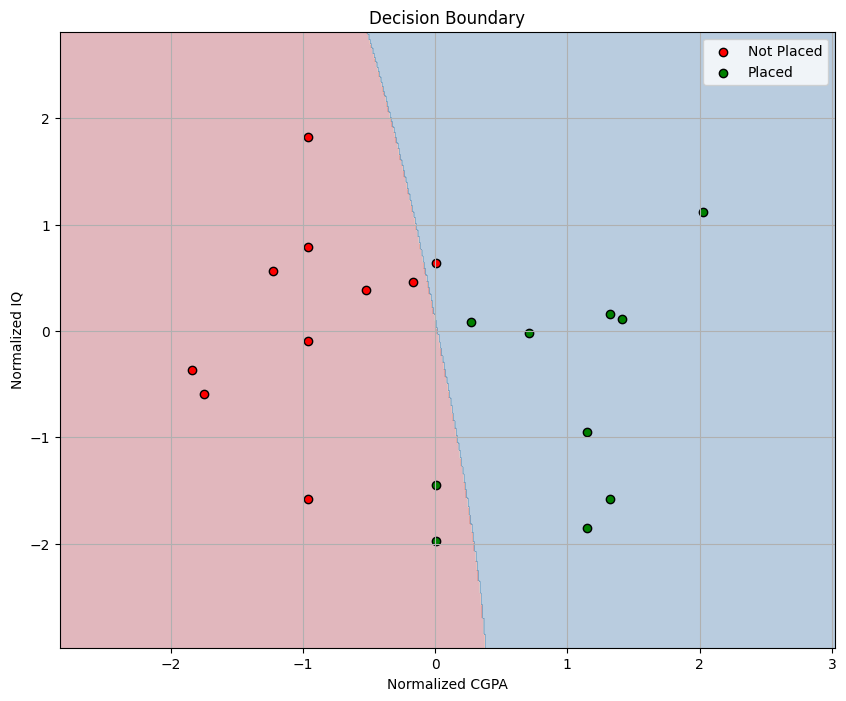


Final Parameters:
W1:
[[ 5.51368773  9.09561104]
 [-0.18200519  2.36359615]]
b1:
[[-2.1353757]
 [ 1.2699811]]
W2:
[[7.10807528]
 [5.04019321]]
b2:
[[-4.88024844]]


In [34]:
if __name__ == "__main__":
    trained_parameters, scaler = main()